Importing the Dependencies

In [107]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Data Collection and Processing

In [108]:
# loading the csv data to a Pandas DataFrame
heart_data = pd.read_csv('/content/data.csv')

In [109]:
# print first 5 rows of the dataset
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [110]:
# print last 5 rows of the dataset
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [111]:
# number of rows and columns in the dataset
heart_data.shape

(303, 14)

In [112]:
# getting some info about the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [113]:
# checking for missing values
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [114]:
# statistical measures about the data
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [115]:
# checking the distribution of Target Variable
heart_data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

1 --> Defective Heart

0 --> Healthy Heart

In [116]:
heart_data_0 = heart_data[(heart_data['target'] == 0)]
heart_data_1 = heart_data[(heart_data['target'] == 1)]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


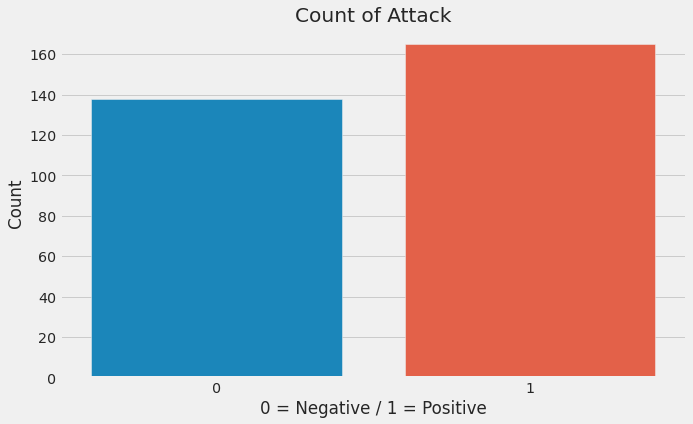

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(10,6)})
sns.set(font_scale=1.3)
plt.style.use('fivethirtyeight')
ax = sns.countplot(heart_data['target'])
ax.set_title('Count of Attack');
ax.set(xlabel='0 = Negative / 1 = Positive', ylabel='Count');

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

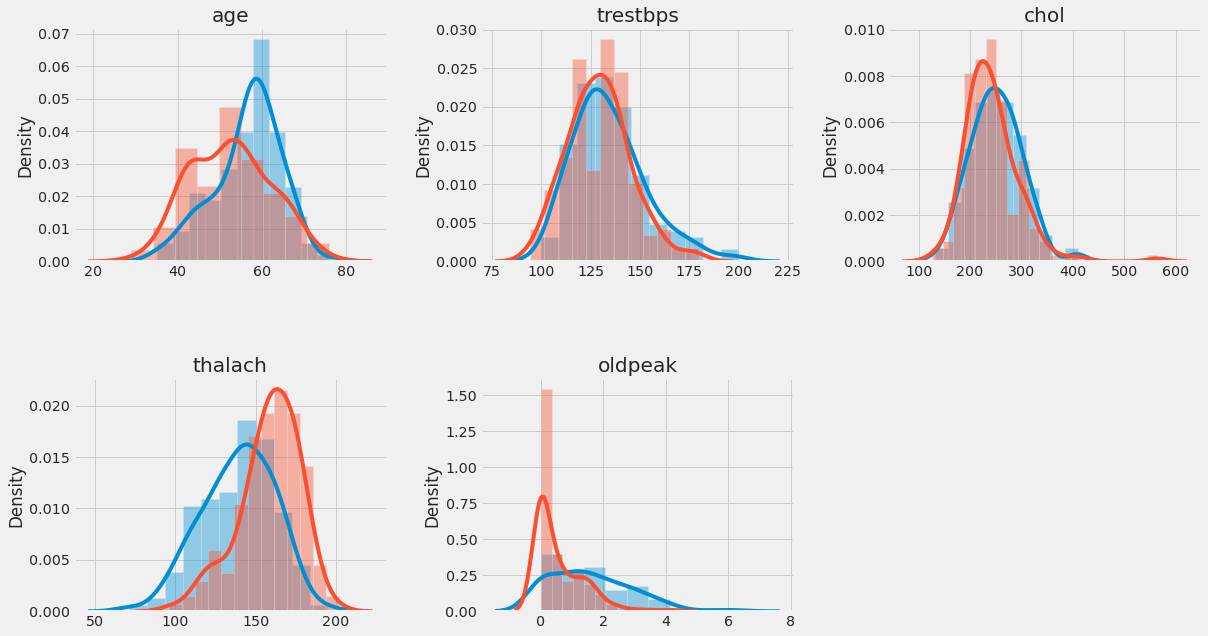

In [118]:
columns = ['age','trestbps','chol','thalach','oldpeak']

length = len(columns)
plt.subplots(figsize=(18,10))

for i, j in zip(columns, range(length)):
    plt.subplot((length/2), 3, j+1)
    plt.subplots_adjust(wspace=.3, hspace=.5)
    sns.distplot(x=heart_data_0[i])
    sns.distplot(x=heart_data_1[i])    
    plt.title(i);     

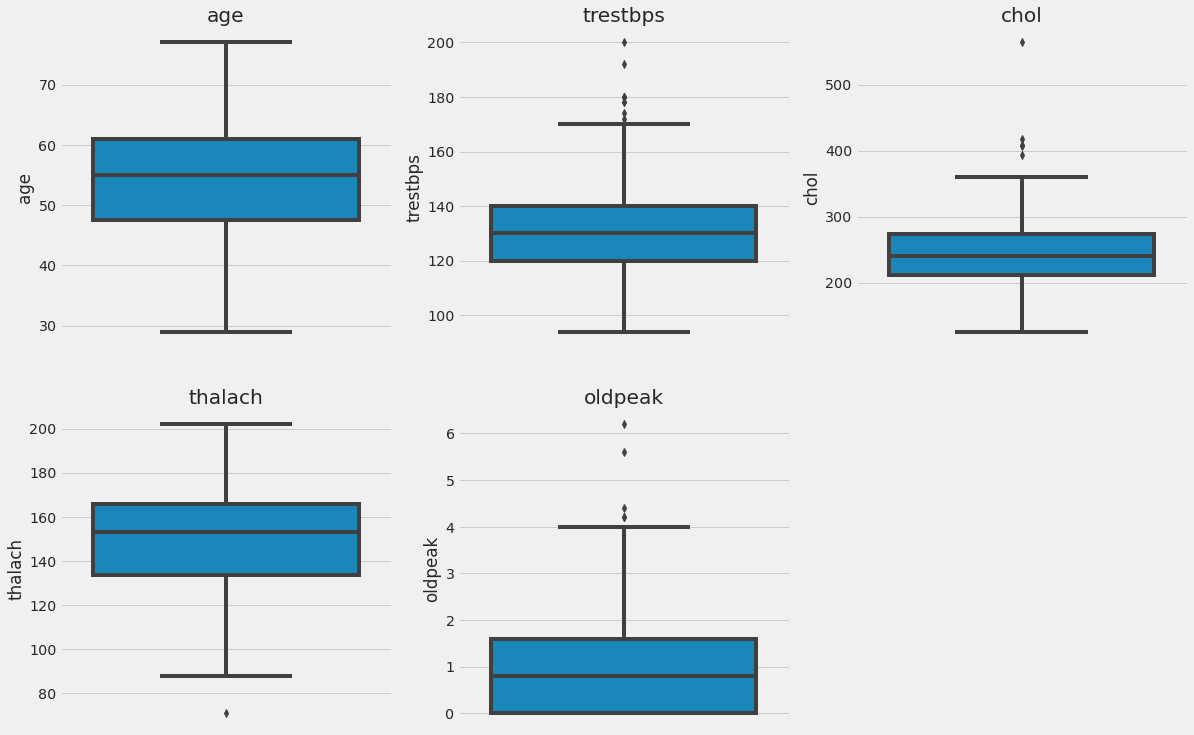

In [119]:
plt.subplots(figsize=(18,12))
length = len(columns)

for i, j in zip(columns, range(length)):
    plt.subplot((length/2), 3, j+1)
    sns.boxplot(y=heart_data[i])
    plt.title(i)

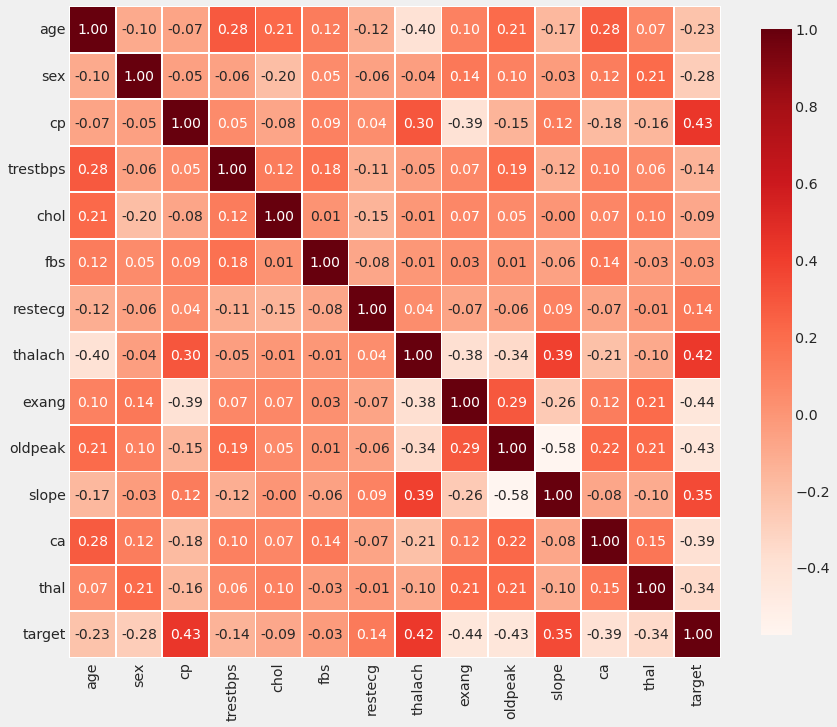

In [120]:
plt.figure(figsize=(13,13))
sns.heatmap(heart_data.corr(), annot=True, cmap=plt.cm.Reds, cbar_kws={'shrink': .8}, square=True, fmt='.2f', 
            linewidths=.8);

Splitting the Features and Target

In [121]:
X = heart_data.drop(columns='target', axis=1)
Y = heart_data['target']

In [122]:
print(X)

     age  sex  cp  trestbps  chol  ...  exang  oldpeak  slope  ca  thal
0     63    1   3       145   233  ...      0      2.3      0   0     1
1     37    1   2       130   250  ...      0      3.5      0   0     2
2     41    0   1       130   204  ...      0      1.4      2   0     2
3     56    1   1       120   236  ...      0      0.8      2   0     2
4     57    0   0       120   354  ...      1      0.6      2   0     2
..   ...  ...  ..       ...   ...  ...    ...      ...    ...  ..   ...
298   57    0   0       140   241  ...      1      0.2      1   0     3
299   45    1   3       110   264  ...      0      1.2      1   0     3
300   68    1   0       144   193  ...      0      3.4      1   2     3
301   57    1   0       130   131  ...      1      1.2      1   1     3
302   57    0   1       130   236  ...      0      0.0      1   1     2

[303 rows x 13 columns]


In [123]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


Splitting the Data into Training data & Test Data

In [124]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [125]:
print(X.shape, X_train.shape, X_test.shape)

(303, 13) (242, 13) (61, 13)


**MODEL TRAINING**

In [126]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

**RANDOM FOREST CLASSIFIER**

In [127]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
randomforest_classifier= RandomForestClassifier(n_estimators=10)
randomforest_classifier.fit(X_train, Y_train)

print_score(randomforest_classifier, X_train, Y_train, X_test, Y_test, train=True)
print_score(randomforest_classifier, X_train, Y_train, X_test, Y_test, train=False)


Train Result:
Accuracy Score: 98.76%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.981982    0.992366  0.987603    0.987174      0.987646
recall       0.990909    0.984848  0.987603    0.987879      0.987603
f1-score     0.986425    0.988593  0.987603    0.987509      0.987608
support    110.000000  132.000000  0.987603  242.000000    242.000000
_______________________________________________
Confusion Matrix: 
 [[109   1]
 [  2 130]]

Test Result:
Accuracy Score: 80.33%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.785714   0.818182  0.803279   0.801948      0.803279
recall      0.785714   0.818182  0.803279   0.801948      0.803279
f1-score    0.785714   0.818182  0.803279   0.801948      0.803279
support    28.000000  33.000000  0.803279  61.000000     61.000000
________

In [128]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
randomforest_classifier= RandomForestClassifier(n_estimators=400,max_depth=30, random_state=92)
randomforest_classifier.fit(X_train, Y_train)

print_score(randomforest_classifier, X_train, Y_train, X_test, Y_test, train=True)
print_score(randomforest_classifier, X_train, Y_train, X_test, Y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    110.0  132.0       1.0      242.0         242.0
_______________________________________________
Confusion Matrix: 
 [[110   0]
 [  0 132]]

Test Result:
Accuracy Score: 77.05%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.733333   0.806452  0.770492   0.769892      0.772889
recall      0.785714   0.757576  0.770492   0.771645      0.770492
f1-score    0.758621   0.781250  0.770492   0.769935      0.770863
support    28.000000  33.000000  0.770492  61.000000     61.000000
_______________________________________________
Confusion Matr

In [129]:
model_evaluation = cross_val_score(estimator = randomforest_classifier , X = X, y = Y, cv = 15)
print("Model evaluation scores:",model_evaluation)
print("Model Evaluation mean score:",model_evaluation.mean())

Model evaluation scores: [0.9047619  0.85714286 0.80952381 0.85       0.9        0.95
 0.85       0.85       0.75       0.9        0.7        0.85
 0.7        0.8        0.8       ]
Model Evaluation mean score: 0.8314285714285714


In [130]:
model_evaluation = cross_val_score(estimator = randomforest_classifier , X = X, y = Y, cv = 10)
print("Model evaluation scores:",model_evaluation)
print("Model Evaluation mean score:",model_evaluation.mean())

Model evaluation scores: [0.90322581 0.80645161 0.87096774 0.9        0.9        0.83333333
 0.7        0.83333333 0.73333333 0.76666667]
Model Evaluation mean score: 0.824731182795699


**LOGISTIC REGRESSION**

In [131]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(C=100, random_state=20, solver='lbfgs')
lr_clf.fit(X_train, Y_train)

print_score(lr_clf, X_train, Y_train, X_test, Y_test, train=True)
print_score(lr_clf, X_train, Y_train, X_test, Y_test, train=False)

Train Result:
Accuracy Score: 85.54%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.894737    0.829932  0.855372    0.862334      0.859389
recall       0.772727    0.924242  0.855372    0.848485      0.855372
f1-score     0.829268    0.874552  0.855372    0.851910      0.853968
support    110.000000  132.000000  0.855372  242.000000    242.000000
_______________________________________________
Confusion Matrix: 
 [[ 85  25]
 [ 10 122]]

Test Result:
Accuracy Score: 81.97%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.793103   0.843750  0.819672   0.818427      0.820502
recall      0.821429   0.818182  0.819672   0.819805      0.819672
f1-score    0.807018   0.830769  0.819672   0.818893      0.819867
support    28.000000  33.000000  0.819672  61.000000     61.000000
________

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [132]:
lr_clf1 = LogisticRegression(C=230, random_state=40)
lr_clf1.fit(X_train, Y_train)

print_score(lr_clf1, X_train, Y_train, X_test, Y_test, train=True)
print_score(lr_clf1, X_train, Y_train, X_test, Y_test, train=False)

Train Result:
Accuracy Score: 85.54%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.894737    0.829932  0.855372    0.862334      0.859389
recall       0.772727    0.924242  0.855372    0.848485      0.855372
f1-score     0.829268    0.874552  0.855372    0.851910      0.853968
support    110.000000  132.000000  0.855372  242.000000    242.000000
_______________________________________________
Confusion Matrix: 
 [[ 85  25]
 [ 10 122]]

Test Result:
Accuracy Score: 83.61%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.821429   0.848485  0.836066   0.834957      0.836066
recall      0.821429   0.848485  0.836066   0.834957      0.836066
f1-score    0.821429   0.848485  0.836066   0.834957      0.836066
support    28.000000  33.000000  0.836066  61.000000     61.000000
________

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [133]:
model_evaluation = cross_val_score(estimator = lr_clf , X = X, y = Y, cv = 10)
print("Model evaluation scores:",model_evaluation)
print("Model Evaluation mean score:",model_evaluation.mean())

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Model evaluation scores: [0.87096774 0.77419355 0.83870968 0.93333333 0.9        0.8
 0.83333333 0.86666667 0.7        0.73333333]
Model Evaluation mean score: 0.8250537634408601


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


**K-NEAREST NEIGHBOURS**

In [134]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn_clf.fit(X_train, Y_train)

print_score(knn_clf, X_train, Y_train, X_test, Y_test, train=True)
print_score(knn_clf, X_train, Y_train, X_test, Y_test, train=False)

Train Result:
Accuracy Score: 78.10%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.771429    0.788321  0.780992    0.779875      0.780643
recall       0.736364    0.818182  0.780992    0.777273      0.780992
f1-score     0.753488    0.802974  0.780992    0.778231      0.780481
support    110.000000  132.000000  0.780992  242.000000    242.000000
_______________________________________________
Confusion Matrix: 
 [[ 81  29]
 [ 24 108]]

Test Result:
Accuracy Score: 62.30%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.592593   0.647059  0.622951   0.619826      0.622058
recall      0.571429   0.666667  0.622951   0.619048      0.622951
f1-score    0.581818   0.656716  0.622951   0.619267      0.622337
support    28.000000  33.000000  0.622951  61.000000     61.000000
________

In [135]:
knn_clf1 = KNeighborsClassifier(n_neighbors=4, p=3, metric='minkowski')
knn_clf1.fit(X_train, Y_train)

print_score(knn_clf1, X_train, Y_train, X_test, Y_test, train=True)
print_score(knn_clf1, X_train, Y_train, X_test, Y_test, train=False)

Train Result:
Accuracy Score: 73.55%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.671642    0.814815  0.735537    0.743228      0.749736
recall       0.818182    0.666667  0.735537    0.742424      0.735537
f1-score     0.737705    0.733333  0.735537    0.735519      0.735320
support    110.000000  132.000000  0.735537  242.000000    242.000000
_______________________________________________
Confusion Matrix: 
 [[90 20]
 [44 88]]

Test Result:
Accuracy Score: 59.02%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.542857   0.653846  0.590164   0.598352      0.602900
recall      0.678571   0.515152  0.590164   0.596861      0.590164
f1-score    0.603175   0.576271  0.590164   0.589723      0.588620
support    28.000000  33.000000  0.590164  61.000000     61.000000
____________

In [136]:
model_evaluation = cross_val_score(estimator = knn_clf , X = X, y = Y, cv = 5)
print("Model evaluation scores:",model_evaluation)
print("Model Evaluation mean score:",model_evaluation.mean())

Model evaluation scores: [0.60655738 0.6557377  0.57377049 0.73333333 0.65      ]
Model Evaluation mean score: 0.643879781420765


In [137]:
model_evaluation = cross_val_score(estimator = knn_clf , X = X, y = Y, cv =12)
print("Model evaluation scores:",model_evaluation)
print("Model Evaluation mean score:",model_evaluation.mean())

Model evaluation scores: [0.73076923 0.65384615 0.46153846 0.72       0.64       0.72
 0.52       0.76       0.72       0.6        0.6        0.8       ]
Model Evaluation mean score: 0.6605128205128205


**SVM**

In [138]:
from sklearn.svm import SVC


svm_clf = SVC(kernel='rbf', C=0.783)
svm_clf.fit(X_train, Y_train)

print_score(svm_clf, X_train, Y_train, X_test, Y_test, train=True)
print_score(svm_clf, X_train, Y_train, X_test, Y_test, train=False)

Train Result:
Accuracy Score: 67.77%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.728571    0.656977  0.677686    0.692774      0.689520
recall       0.463636    0.856061  0.677686    0.659848      0.677686
f1-score     0.566667    0.743421  0.677686    0.655044      0.663078
support    110.000000  132.000000  0.677686  242.000000    242.000000
_______________________________________________
Confusion Matrix: 
 [[ 51  59]
 [ 19 113]]

Test Result:
Accuracy Score: 63.93%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.650000   0.634146  0.639344   0.642073      0.641423
recall      0.464286   0.787879  0.639344   0.626082      0.639344
f1-score    0.541667   0.702703  0.639344   0.622185      0.628785
support    28.000000  33.000000  0.639344  61.000000     61.000000
________

In [139]:
svm_clf1 = SVC(kernel='linear', C=0.942)
svm_clf1.fit(X_train, Y_train)

print_score(svm_clf1, X_train, Y_train, X_test, Y_test, train=True)
print_score(svm_clf1, X_train, Y_train, X_test, Y_test, train=False)

Train Result:
Accuracy Score: 85.54%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.912088    0.821192  0.855372    0.866640      0.862508
recall       0.754545    0.939394  0.855372    0.846970      0.855372
f1-score     0.825871    0.876325  0.855372    0.851098      0.853391
support    110.000000  132.000000  0.855372  242.000000    242.000000
_______________________________________________
Confusion Matrix: 
 [[ 83  27]
 [  8 124]]

Test Result:
Accuracy Score: 80.33%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.833333   0.783784  0.803279   0.808559      0.806528
recall      0.714286   0.878788  0.803279   0.796537      0.803279
f1-score    0.769231   0.828571  0.803279   0.798901      0.801333
support    28.000000  33.000000  0.803279  61.000000     61.000000
________

In [140]:
model_evaluation = cross_val_score(estimator = svm_clf , X = X, y = Y, cv =2)
print("Model evaluation scores:",model_evaluation)
print("Model Evaluation mean score:",model_evaluation.mean())

Model evaluation scores: [0.64473684 0.62913907]
Model Evaluation mean score: 0.6369379574764726


In [141]:
model_evaluation = cross_val_score(estimator = svm_clf , X = X, y = Y, cv =6)
print("Model evaluation scores:",model_evaluation)
print("Model Evaluation mean score:",model_evaluation.mean())

Model evaluation scores: [0.62745098 0.56862745 0.74509804 0.64       0.66       0.6       ]
Model Evaluation mean score: 0.6401960784313726


**XGBOOST CLASSIFIER**

In [142]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(use_label_encoder=False)
xgb_clf.fit(X_train, Y_train)

print_score(xgb_clf, X_train, Y_train, X_test, Y_test, train=True)
print_score(xgb_clf, X_train, Y_train, X_test, Y_test, train=False)

Train Result:
Accuracy Score: 98.76%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    1.000000    0.977778  0.987603    0.988889      0.987879
recall       0.972727    1.000000  0.987603    0.986364      0.987603
f1-score     0.986175    0.988764  0.987603    0.987470      0.987587
support    110.000000  132.000000  0.987603  242.000000    242.000000
_______________________________________________
Confusion Matrix: 
 [[107   3]
 [  0 132]]

Test Result:
Accuracy Score: 75.41%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.724138   0.781250  0.754098   0.752694      0.755035
recall      0.750000   0.757576  0.754098   0.753788      0.754098
f1-score    0.736842   0.769231  0.754098   0.753036      0.754364
support    28.000000  33.000000  0.754098  61.000000     61.000000
________

In [143]:
model_evaluation = cross_val_score(estimator = xgb_clf , X = X, y = Y, cv =6)
print("Model evaluation scores:",model_evaluation)
print("Model Evaluation mean score:",model_evaluation.mean())

Model evaluation scores: [0.88235294 0.80392157 0.92156863 0.72       0.78       0.74      ]
Model Evaluation mean score: 0.8079738562091504


In [144]:
model_evaluation = cross_val_score(estimator = xgb_clf , X = X, y = Y, cv =14)
print("Model evaluation scores:",model_evaluation)
print("Model Evaluation mean score:",model_evaluation.mean())

Model evaluation scores: [0.86363636 0.81818182 0.77272727 0.90909091 0.81818182 0.86363636
 0.95454545 0.81818182 0.68181818 0.71428571 0.85714286 0.66666667
 0.76190476 0.76190476]
Model Evaluation mean score: 0.804421768707483


**DECISION TREE**

In [145]:
from sklearn.tree import DecisionTreeClassifier


tree_clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=54)
tree_clf.fit(X_train, Y_train)

print_score(tree_clf, X_train, Y_train, X_test, Y_test, train=True)
print_score(tree_clf, X_train, Y_train, X_test, Y_test, train=False)

Train Result:
Accuracy Score: 85.95%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.839286    0.876923  0.859504    0.858104      0.859815
recall       0.854545    0.863636  0.859504    0.859091      0.859504
f1-score     0.846847    0.870229  0.859504    0.858538      0.859601
support    110.000000  132.000000  0.859504  242.000000    242.000000
_______________________________________________
Confusion Matrix: 
 [[ 94  16]
 [ 18 114]]

Test Result:
Accuracy Score: 75.41%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.709677   0.800000  0.754098   0.754839      0.758540
recall      0.785714   0.727273  0.754098   0.756494      0.754098
f1-score    0.745763   0.761905  0.754098   0.753834      0.754495
support    28.000000  33.000000  0.754098  61.000000     61.000000
________

In [146]:
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=8, random_state=62)
tree_clf.fit(X_train, Y_train)

print_score(tree_clf, X_train, Y_train, X_test, Y_test, train=True)
print_score(tree_clf, X_train, Y_train, X_test, Y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    110.0  132.0       1.0      242.0         242.0
_______________________________________________
Confusion Matrix: 
 [[110   0]
 [  0 132]]

Test Result:
Accuracy Score: 75.41%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.740741   0.764706  0.754098   0.752723      0.753705
recall      0.714286   0.787879  0.754098   0.751082      0.754098
f1-score    0.727273   0.776119  0.754098   0.751696      0.753698
support    28.000000  33.000000  0.754098  61.000000     61.000000
_______________________________________________
Confusion Matr

In [147]:
model_evaluation = cross_val_score(estimator = tree_clf , X = X, y = Y, cv =11)
print("Model evaluation scores:",model_evaluation)
print("Model Evaluation mean score:",model_evaluation.mean())

Model evaluation scores: [0.85714286 0.78571429 0.78571429 0.82142857 0.82142857 0.67857143
 0.55555556 0.77777778 0.7037037  0.74074074 0.74074074]
Model Evaluation mean score: 0.7516835016835017


In [148]:
model_evaluation = cross_val_score(estimator = tree_clf , X = X, y = Y, cv =16)
print("Model evaluation scores:",model_evaluation)
print("Model Evaluation mean score:",model_evaluation.mean())

Model evaluation scores: [0.84210526 0.84210526 0.89473684 0.84210526 0.84210526 0.78947368
 0.84210526 0.78947368 0.78947368 0.57894737 0.73684211 0.63157895
 0.84210526 0.73684211 0.73684211 0.83333333]
Model Evaluation mean score: 0.7856359649122806


**Features Importance According to Random Forest and XGBoost**

In [158]:
def feature_imp(df, model):
    fi = pd.DataFrame()
    fi["feature"] = df.columns
    fi["importance"] = model.feature_importances_
    return fi.sort_values(by="importance", ascending=False)

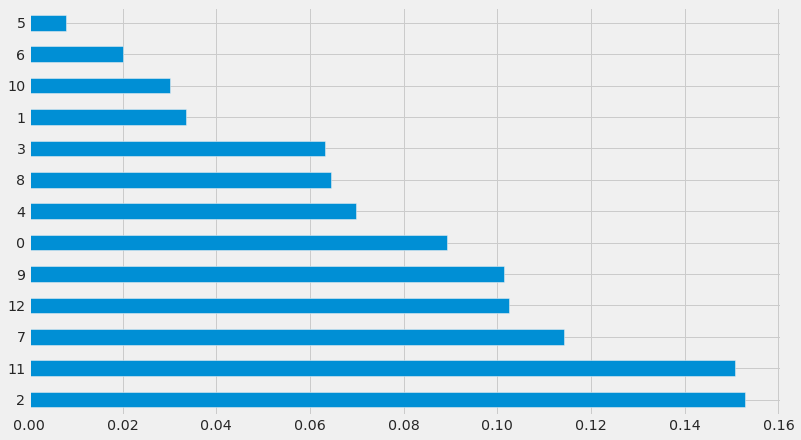

In [159]:
feature_imp(X, randomforest_classifier).plot(kind='barh', figsize=(12,7), legend=False)

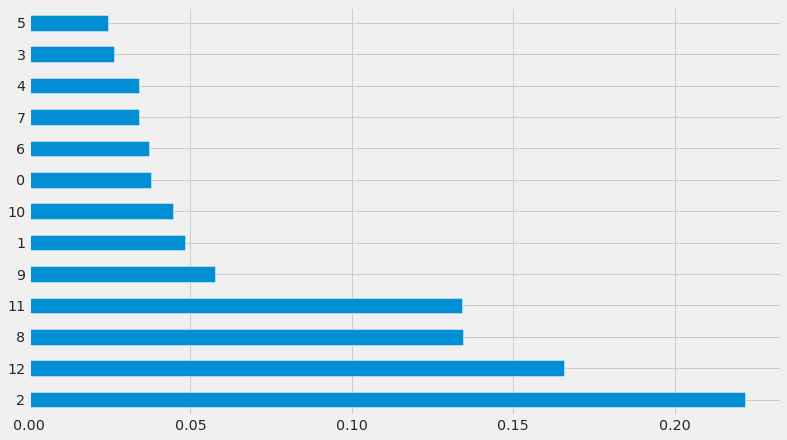

In [160]:
feature_imp(X, xgb_clf).plot(kind='barh', figsize=(12,7), legend=False)

**CONCLUSION**


In this project we implemented random forest classification, logistic regression, XGboost classifier, K-nearest neighbours, SVM, decision tree classification and among all of this we got highest accuracy from logistic regression model which is 83.61%.